In [3]:
from IVM import load, forward_batch
ckpt_path = "/mnt/afs/zhengjinliang/5K.bin" # your model path here
model = load(ckpt_path, low_gpu_memory = False)

/usr/local/lib/miniconda3/envs/IVM/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/mnt/afs/zhengjinliang/IVM/IVM.py:29: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setti

trainable params: 4,194,304 || all params: 7,067,621,376 || trainable%: 0.0593


In [51]:
import torch
ckpt = torch.load("/mnt/afs/zhengjinliang/20W.bin")
model.load_state_dict(ckpt, strict=False)

/tmp/ipykernel_1074882/399936835.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("/mnt/afs/zhengjinliang/20W.bin")


_IncompatibleKeys(missing_keys=['image_encoder.pos_embed', 'image_encoder.patch_embed.proj.weight', 'image_encoder.patch_embed.proj.bias', 'image_encoder.blocks.0.norm1.weight', 'image_encoder.blocks.0.norm1.bias', 'image_encoder.blocks.0.attn.rel_pos_h', 'image_encoder.blocks.0.attn.rel_pos_w', 'image_encoder.blocks.0.attn.qkv.weight', 'image_encoder.blocks.0.attn.qkv.bias', 'image_encoder.blocks.0.attn.proj.weight', 'image_encoder.blocks.0.attn.proj.bias', 'image_encoder.blocks.0.norm2.weight', 'image_encoder.blocks.0.norm2.bias', 'image_encoder.blocks.0.mlp.lin1.weight', 'image_encoder.blocks.0.mlp.lin1.bias', 'image_encoder.blocks.0.mlp.lin2.weight', 'image_encoder.blocks.0.mlp.lin2.bias', 'image_encoder.blocks.1.norm1.weight', 'image_encoder.blocks.1.norm1.bias', 'image_encoder.blocks.1.attn.rel_pos_h', 'image_encoder.blocks.1.attn.rel_pos_w', 'image_encoder.blocks.1.attn.qkv.weight', 'image_encoder.blocks.1.attn.qkv.bias', 'image_encoder.blocks.1.attn.proj.weight', 'image_encoder

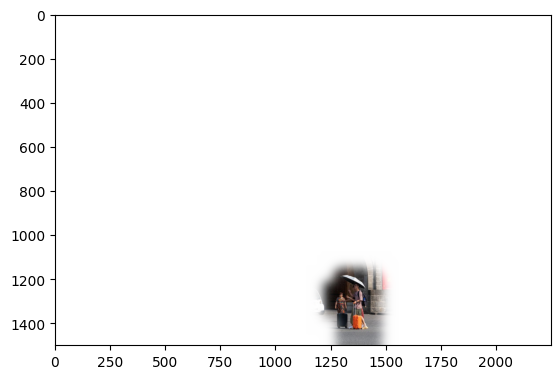

In [52]:
from PIL import Image

image = Image.open("image/demo/VQA.jpg") # your image path
instruction = "Is there anyone hold an umbrella?" 

result = forward_batch(model, [image], [instruction], threshold = 0.8)
from matplotlib import pyplot as plt
import numpy as np
plt.imshow((result[0]).astype(np.uint8))

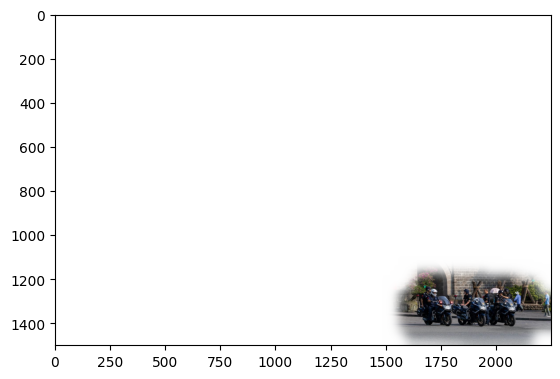

In [53]:
from PIL import Image

image = Image.open("image/demo/VQA.jpg") # your image path
instruction = "How many motocycles are there" 

result = forward_batch(model, [image], [instruction], threshold = 0.8)
from matplotlib import pyplot as plt
import numpy as np
plt.imshow((result[0]).astype(np.uint8))

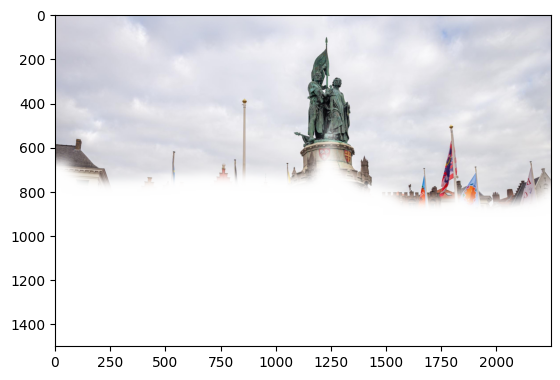

In [54]:
from PIL import Image

image = Image.open("image/demo/VQA2.jpg") # your image path
instruction = "Is there cloud in the sky?" 

result = forward_batch(model, [image], [instruction], threshold = 0.8)
from matplotlib import pyplot as plt
import numpy as np
plt.imshow((result[0]).astype(np.uint8))

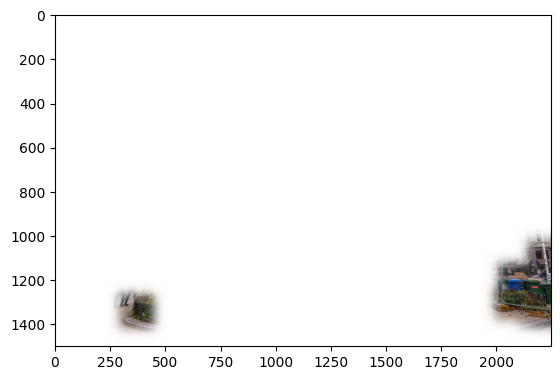

In [55]:
from PIL import Image

image = Image.open("image/demo/VQA2.jpg") # your image path
instruction = "Where can I throw out rubbish?" 

result = forward_batch(model, [image], [instruction], threshold = 0.8)
from matplotlib import pyplot as plt
import numpy as np
plt.imshow((result[0]).astype(np.uint8))

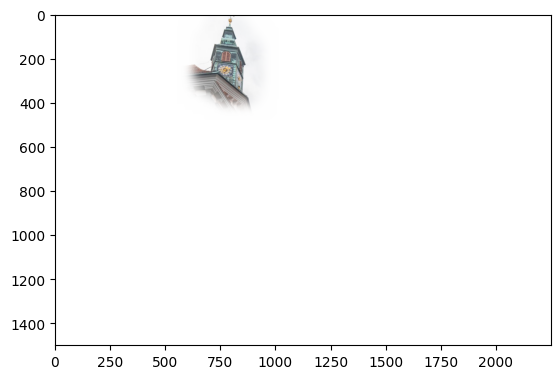

In [56]:
from PIL import Image

image = Image.open("image/demo/VQA3.jpg") # your image path
instruction = "What is the time now?" 

result = forward_batch(model, [image], [instruction], threshold = 0.8)
from matplotlib import pyplot as plt
import numpy as np
plt.imshow((result[0]).astype(np.uint8))

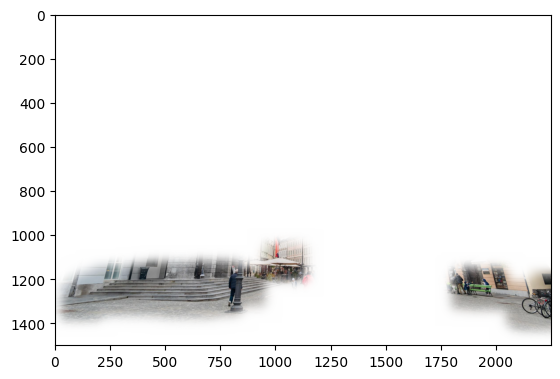

In [58]:
from PIL import Image
image = Image.open("image/demo/VQA3.jpg") # your image path
instruction = "Where can I sit?" 

result = forward_batch(model, [image], [instruction], threshold = 0.8)
from matplotlib import pyplot as plt
import numpy as np
plt.imshow((result[0]).astype(np.uint8))

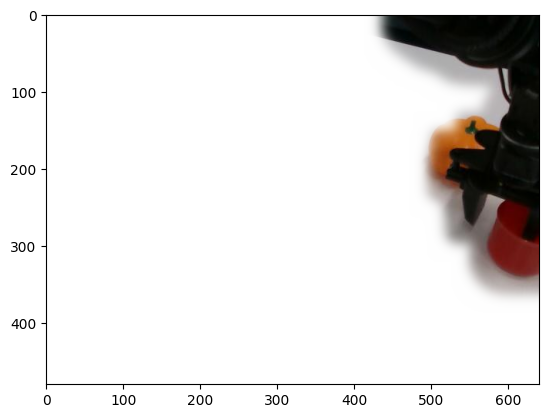

In [59]:
from PIL import Image

image = Image.open("image/demo/robot.jpg") # your image path
instruction = "pick up the red cup" 

result = forward_batch(model, [image], [instruction], threshold = 0.9)
from matplotlib import pyplot as plt
import numpy as np
plt.imshow((result[0]).astype(np.uint8))

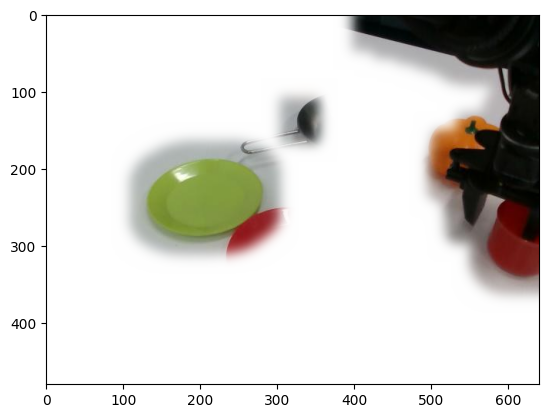

In [60]:
from PIL import Image

image = Image.open("image/demo/robot.jpg") # your image path
instruction = "pick up the red cup and place it on the green pan" 

result = forward_batch(model, [image], [instruction], threshold = 0.9)
from matplotlib import pyplot as plt
import numpy as np
plt.imshow((result[0]).astype(np.uint8))

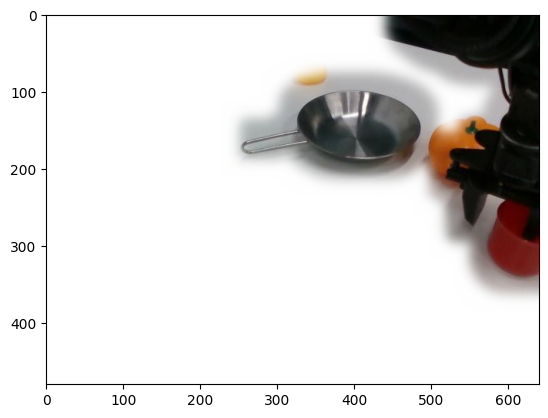

In [61]:
from PIL import Image

image = Image.open("image/demo/robot.jpg") # your image path
instruction = "pick up the red cup and place it on the sivler pan" 

result = forward_batch(model, [image], [instruction], threshold = 0.99)
from matplotlib import pyplot as plt
import numpy as np
plt.imshow((result[0]).astype(np.uint8))

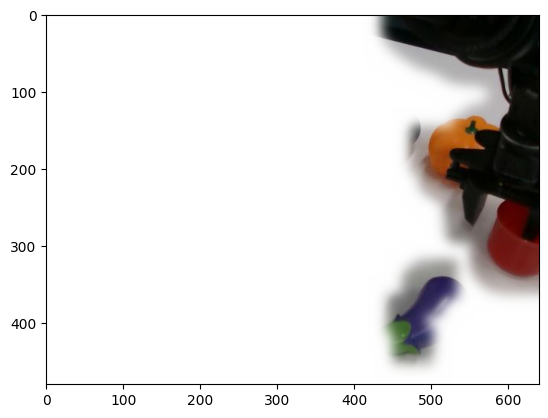

In [74]:
from PIL import Image

image = Image.open("image/demo/robot.jpg") # your image path
instruction = "pick the purple thing" 

result = forward_batch(model, [image], [instruction], threshold = 0.7)
from matplotlib import pyplot as plt
import numpy as np
plt.imshow((result[0]).astype(np.uint8))